In [1]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
'''Reading in all the cleaned csvs'''
adidas_default = pd.read_csv('Resources/adidas_default')

apparel_by_month = pd.read_csv('Resources/apparel_csvs/adidas_apparel_by_month')
apparel_by_temp = pd.read_csv('Resources/apparel_csvs/adidas_apparel_by_temp.csv')

athletic_by_month = pd.read_csv('Resources/athletic_csvs/athletic_month_sales')
athletic_by_temp = pd.read_csv('Resources/athletic_csvs/athletic_temp_sales')

street_by_month = pd.read_csv('Resources/street_footwear_csvs/adidas_street_footwear_by_month')
street_by_temp = pd.read_csv('Resources/street_footwear_csvs/adidas_street_footwear_by_temp.csv')

total_2021_sales_region = pd.read_csv('Resources/athletic_csvs/total_adidas_2021_monthly_sales_by_region')
total_2021_sales_month = pd.read_csv('Resources/athletic_csvs/total_adidas_2021_sales_by_month')

In [3]:
'''reading in the regional category csvs'''
apparel_mw = pd.read_csv('Resources/apparel_csvs/mw_apparel_temp')
apparel_ne = pd.read_csv('Resources/apparel_csvs/ne_apparel_temp')
apparel_west = pd.read_csv('Resources/apparel_csvs/west_apparel_temp')
apparel_se = pd.read_csv('Resources/apparel_csvs/se_apparel_temp')
apparel_s = pd.read_csv('Resources/apparel_csvs/south_apparel_temp')

apparel_trends = pd.read_csv('Resources/apparel_csvs/apparel_regions_trends.csv')


athletic_mw = pd.read_csv('Resources/athletic_csvs/mw_athletic_temp')
athletic_ne = pd.read_csv('Resources/athletic_csvs/ne_athletic_temp')
athletic_west = pd.read_csv('Resources/athletic_csvs/west_athletic_temp')
athletic_se = pd.read_csv('Resources/athletic_csvs/se_athletic_temp')
athletic_s = pd.read_csv('Resources/athletic_csvs/south_athletic_temp')

athletic_trends = pd.read_csv('Resources/athletic_csvs/athletic_trends')


street_mw = pd.read_csv('Resources/street_footwear_csvs/mw_street_temp')
street_ne = pd.read_csv('Resources/street_footwear_csvs/ne_street_temp')
street_west = pd.read_csv('Resources/street_footwear_csvs/west_street_temp')
street_se = pd.read_csv('Resources/street_footwear_csvs/se_street_temp')
street_s = pd.read_csv('Resources/street_footwear_csvs/south_street_temp')

street_trends = pd.read_csv('Resources/street_footwear_csvs/street_regions_trends.csv')

total_2021_trends = pd.read_csv('Resources/athletic_csvs/total_2021_trends')

In [4]:
'''Renaming Total Sales to their proper categories'''
apparel_mw = apparel_mw.set_index('Average Temp')
apparel_mw = apparel_mw.rename(
    columns={
        '(Midwest) Total Sales': 'Apparel Sales'
    }
)
athletic_mw = athletic_mw.set_index('Average Temp')
athletic_mw = athletic_mw.rename(
    columns={
        '(Midwest) Total Sales': 'Athletic Sales'
    }
)
street_mw = street_mw.set_index('Average Temp')
street_mw = street_mw.rename(
    columns={
        '(Midwest) Total Sales': 'Street Sales'
    }
)



apparel_ne = apparel_ne.set_index('Average Temp')
apparel_ne = apparel_ne.rename(
    columns={
        '(Northeast) Total Sales': 'Apparel Sales'
    }
)
athletic_ne = athletic_ne.set_index('Average Temp')
athletic_ne = athletic_ne.rename(
    columns={
        '(Northeast) Total Sales': 'Athletic Sales'
    }
)
street_ne = street_ne.set_index('Average Temp')
street_ne = street_ne.rename(
    columns={
        '(Northeast) Total Sales': 'Street Sales'
    }
)



apparel_west = apparel_west.set_index('Average Temp')
apparel_west = apparel_west.rename(
    columns={
        '(West) Total Sales': 'Apparel Sales'
    }
)
athletic_west = athletic_west.set_index('Average Temp')
athletic_west = athletic_west.rename(
    columns={
        '(West) Total Sales': 'Athletic Sales'
    }
)
street_west = street_west.set_index('Average Temp')
street_west = street_west.rename(
    columns={
        '(West) Total Sales': 'Street Sales'
    }
)



apparel_se = apparel_se.set_index('Average Temp')
apparel_se = apparel_se.rename(
    columns={
        '(Southeast) Total Sales': 'Apparel Sales'
    }
)
athletic_se = athletic_se.set_index('Average Temp')
athletic_se = athletic_se.rename(
    columns={
        '(Southeast) Total Sales': 'Athletic Sales'
    }
)
street_se = street_se.set_index('Average Temp')
street_se = street_se.rename(
    columns={
        '(Southeast) Total Sales': 'Street Sales'
    }
)



apparel_s = apparel_s.set_index('Average Temp')
apparel_s = apparel_s.rename(
    columns={
        '(South) Total Sales': 'Apparel Sales'
    }
)
athletic_s = athletic_s.set_index('Average Temp')
athletic_s = athletic_s.rename(
    columns={
        '(South) Total Sales': 'Athletic Sales'
    }
)
street_s = street_s.set_index('Average Temp')
street_s = street_s.rename(
    columns={
        '(South) Total Sales': 'Street Sales'
    }
)


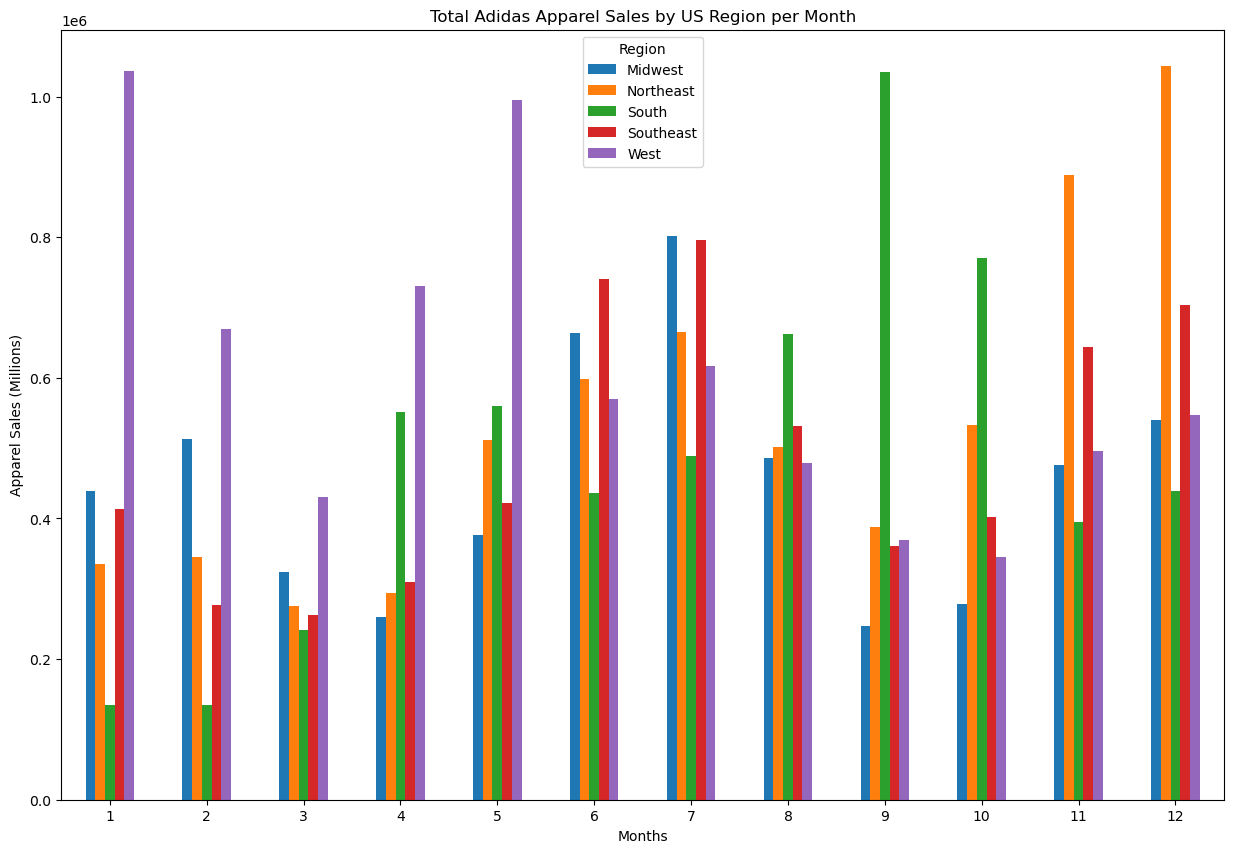

In [ ]:
'''plotting each category by monthly sales by region'''
apparel_by_month = apparel_by_month.groupby(['Region', 'Month'])['Total Sales'].sum().reset_index()

apparel_by_month.pivot(index='Month', columns='Region', values='Total Sales').plot(kind='bar', figsize=(15, 10))

plt.title('Total Adidas Apparel Sales by US Region per Month')
plt.xlabel('Months')
plt.ylabel('Apparel Sales (Millions)')
plt.xticks(rotation=0)
plt.show()

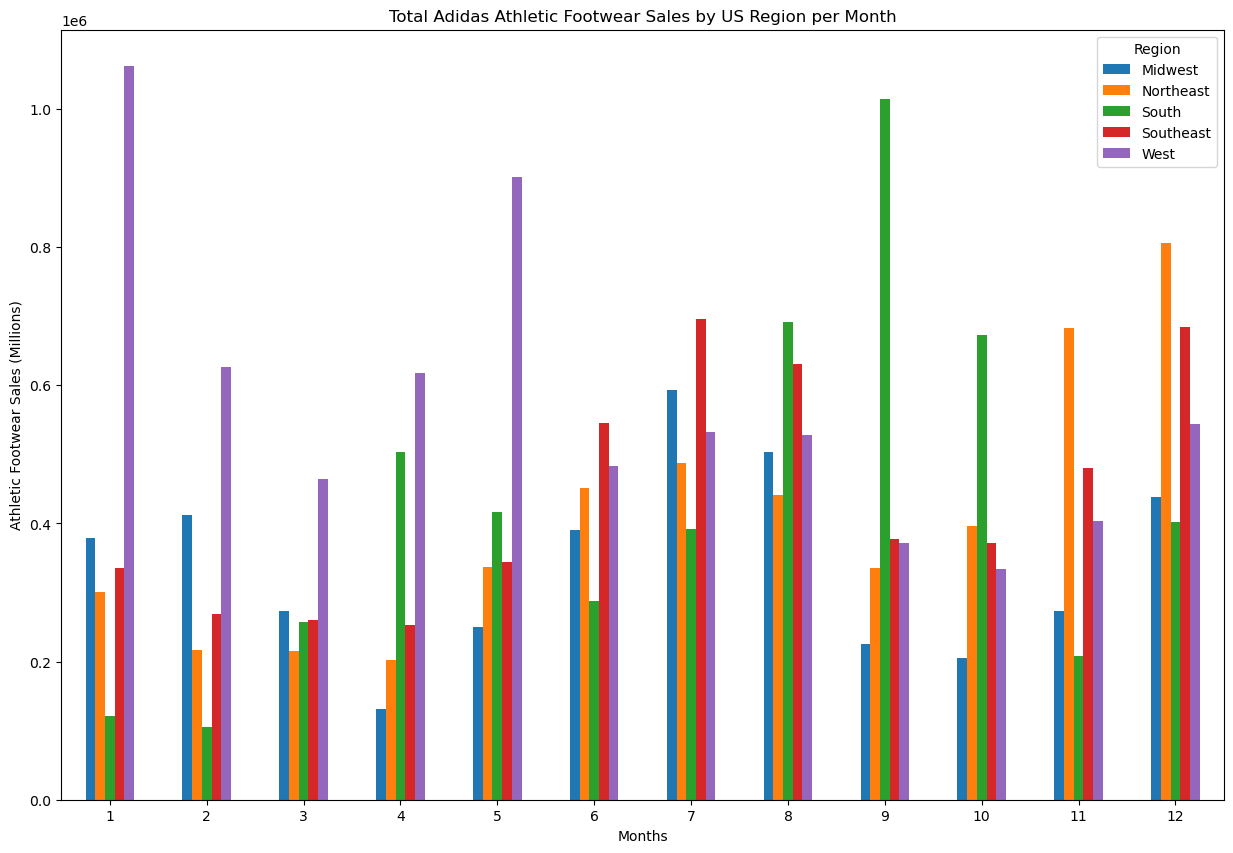

In [6]:
athletic_by_month = athletic_by_month.groupby(['Region', 'Month'])['Total Sales'].sum().reset_index()

athletic_by_month.pivot(index='Month', columns='Region', values='Total Sales').plot(kind='bar', figsize=(15, 10))

plt.title('Total Adidas Athletic Footwear Sales by US Region per Month')
plt.xlabel('Months')
plt.ylabel('Athletic Footwear Sales (Millions)')
plt.xticks(rotation=0)
plt.show()

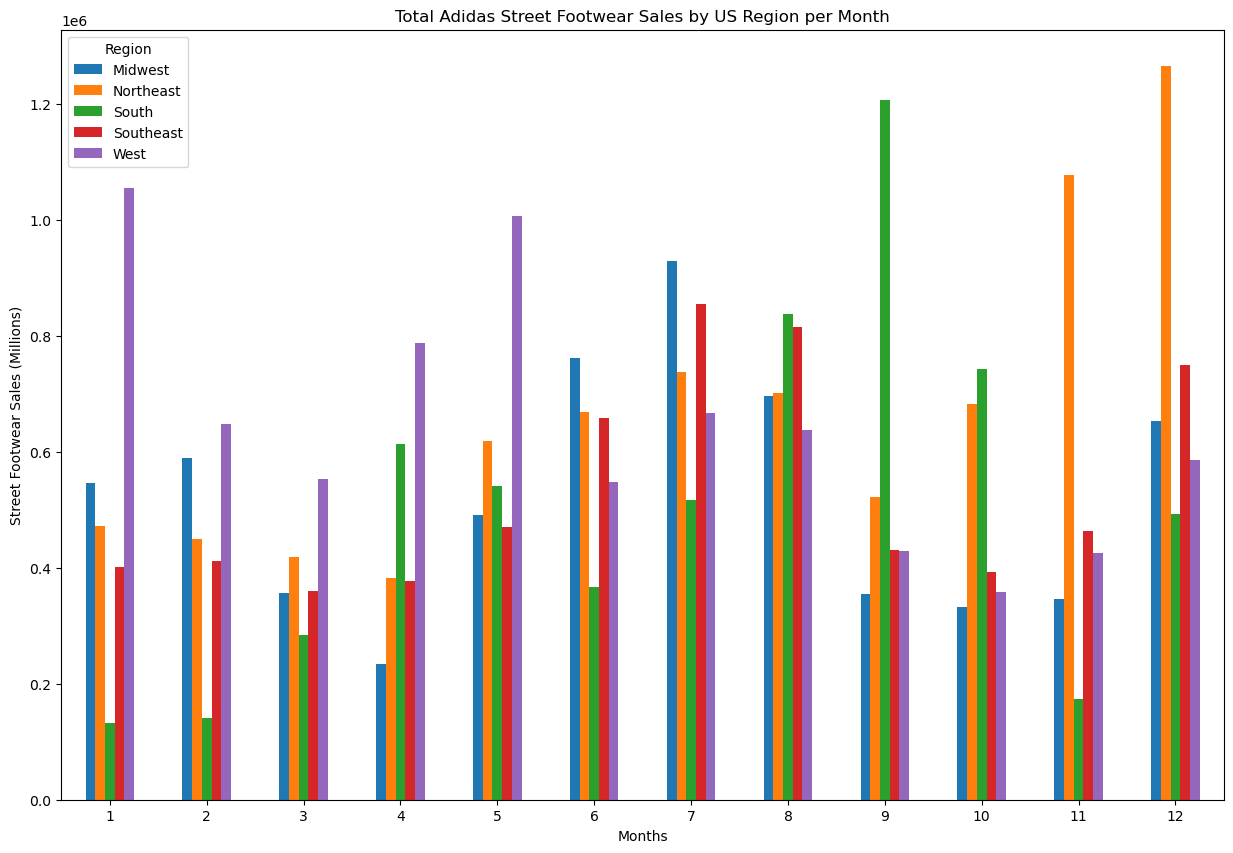

In [7]:
street_by_month = street_by_month.groupby(['Region', 'Month'])['Total Sales'].sum().reset_index()

street_by_month.pivot(index='Month', columns='Region', values='Total Sales').plot(kind='bar', figsize=(15, 10))

plt.title('Total Adidas Street Footwear Sales by US Region per Month')
plt.xlabel('Months')
plt.ylabel('Street Footwear Sales (Millions)')
plt.xticks(rotation=0)
plt.show()

In [8]:
total_2021_sales_region.head()

,Region,Month,Total Sales
0,Midwest,1,1365832
1,Midwest,2,1514927
2,Midwest,3,953807
3,Midwest,4,624363
4,Midwest,5,1117221


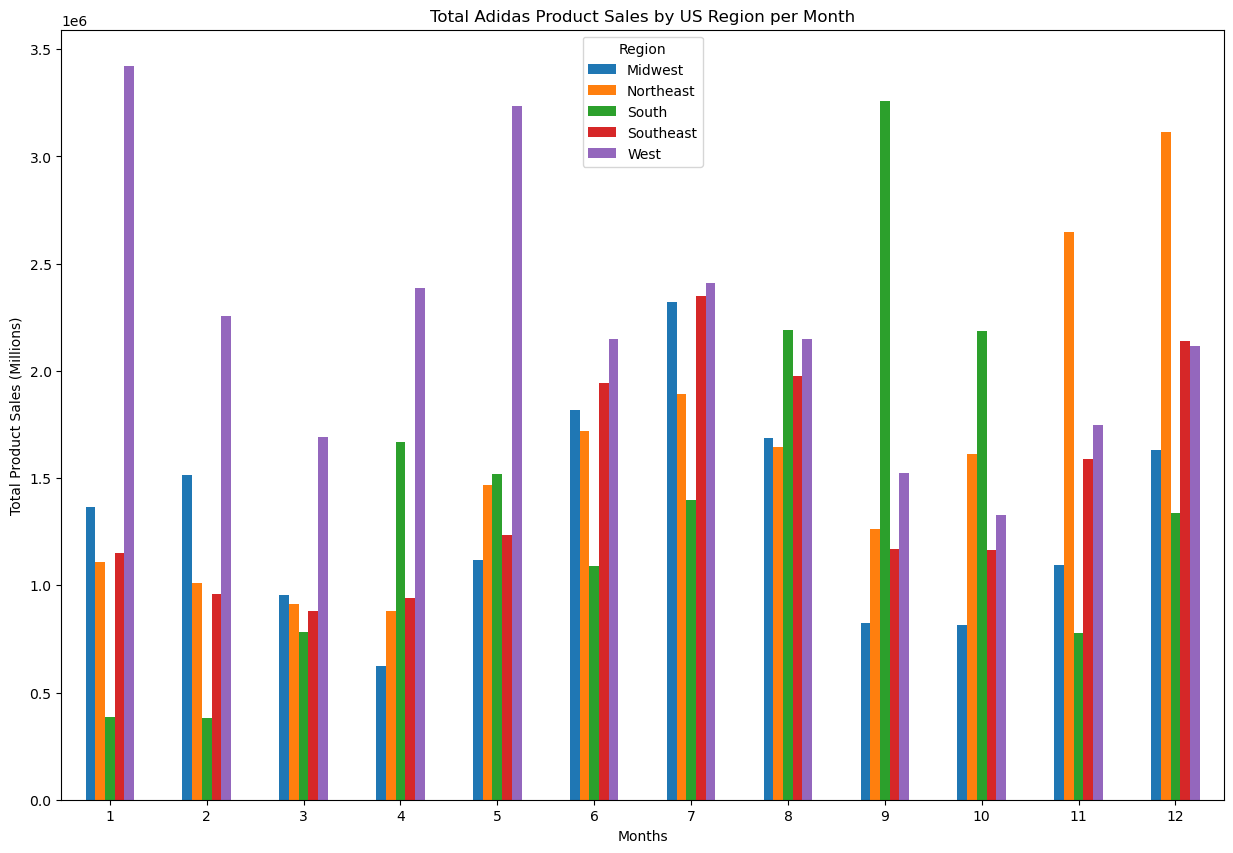

In [9]:
total_2021_sales_region = total_2021_sales_region.groupby(['Region', 'Month'])['Total Sales'].sum().reset_index()

total_2021_sales_region.pivot(index='Month', columns='Region', values='Total Sales').plot(kind='bar', figsize=(15, 10))

plt.title('Total Adidas Product Sales by US Region per Month')
plt.xlabel('Months')
plt.ylabel('Total Product Sales (Millions)')
plt.xticks(rotation=0)
plt.show()

In [10]:
total_2021_sales_month = total_2021_sales_month.set_index('Month')
total_2021_sales_month.head(24)

,2021 Total Sales per Month
Month,
1,7432010
2,6123021
3,5220756
4,6498318
5,8576901
6,8718921
7,10368006
8,9651574
9,8037879


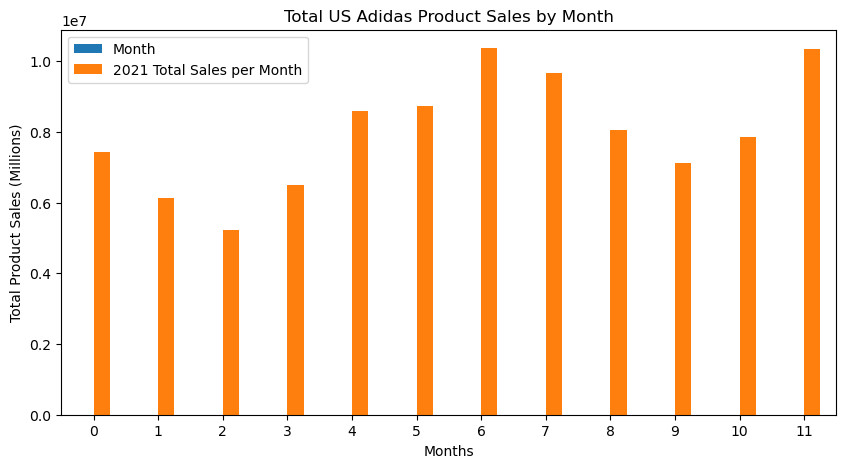

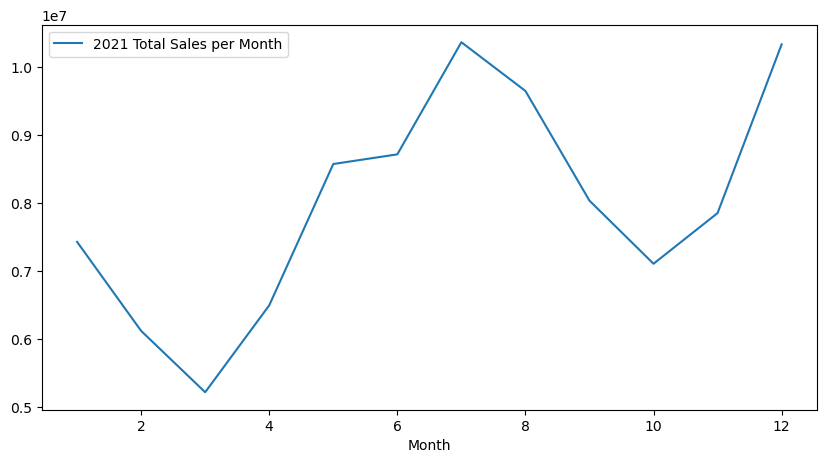

In [ ]:
#plotting total 2021 sales by month
total_2021_sales_month = total_2021_sales_month.groupby(['Month'])['2021 Total Sales per Month'].sum().reset_index()

total_2021_sales_month.plot(kind='bar', figsize=(10, 5))

plt.title('Total US Adidas Product Sales by Month')
plt.xlabel('Months')
plt.ylabel('Total Product Sales (Millions)')
plt.xticks(rotation=0)
plt.show()
total_2021_sales_month = total_2021_sales_month.set_index('Month')
total_2021_sales_month.plot(figsize=(10, 5))
plt.show()

In [ ]:
#grabbing avg temp per month for 2021
temp_month = pd.read_csv('Resources/avg_temps_cleaned.csv')
temp_month = temp_month[temp_month['Year'] == 2021]
temp_month_total = temp_month.groupby(['Month'])['Average Temp'].mean()
temp_month_total = temp_month_total.sort_index()
temp_month_total.head()

Month
1    34.318750
2    31.579167
3    37.320833
4    48.185417
5    55.772917
Name: Average Temp, dtype: float64

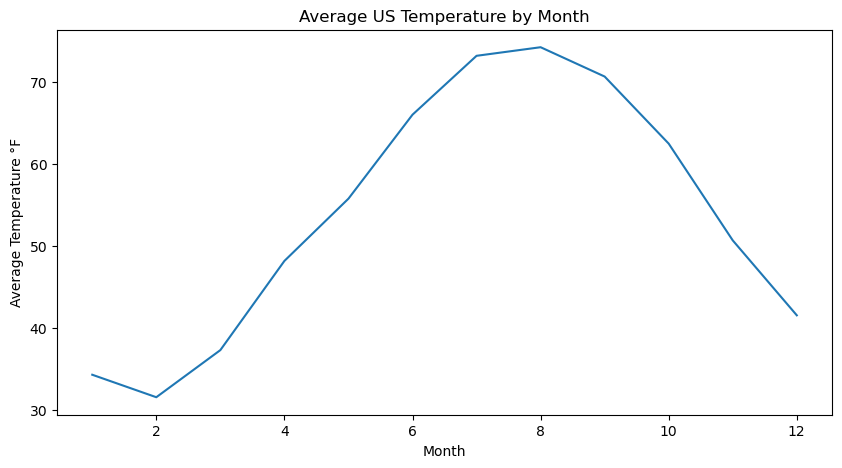

In [ ]:
#plotting avg us temp by month
temp_month_total.plot(figsize=[10,5])
plt.title('Average US Temperature by Month')
plt.ylabel('Average Temperature °F')
plt.show()

In [14]:
region_month_temp = pd.read_csv('Resources/athletic_csvs/adidas_region_month_temp')
region_month_temp.head()

,Region,Month,Average Temp
0,Midwest,2,13.4
1,Midwest,2,15.4
2,Midwest,2,18.2
3,Northeast,2,19.6
4,Midwest,2,19.6


In [15]:
region_month_temp = region_month_temp.groupby(['Region', 'Month'])['Average Temp'].mean().reset_index()

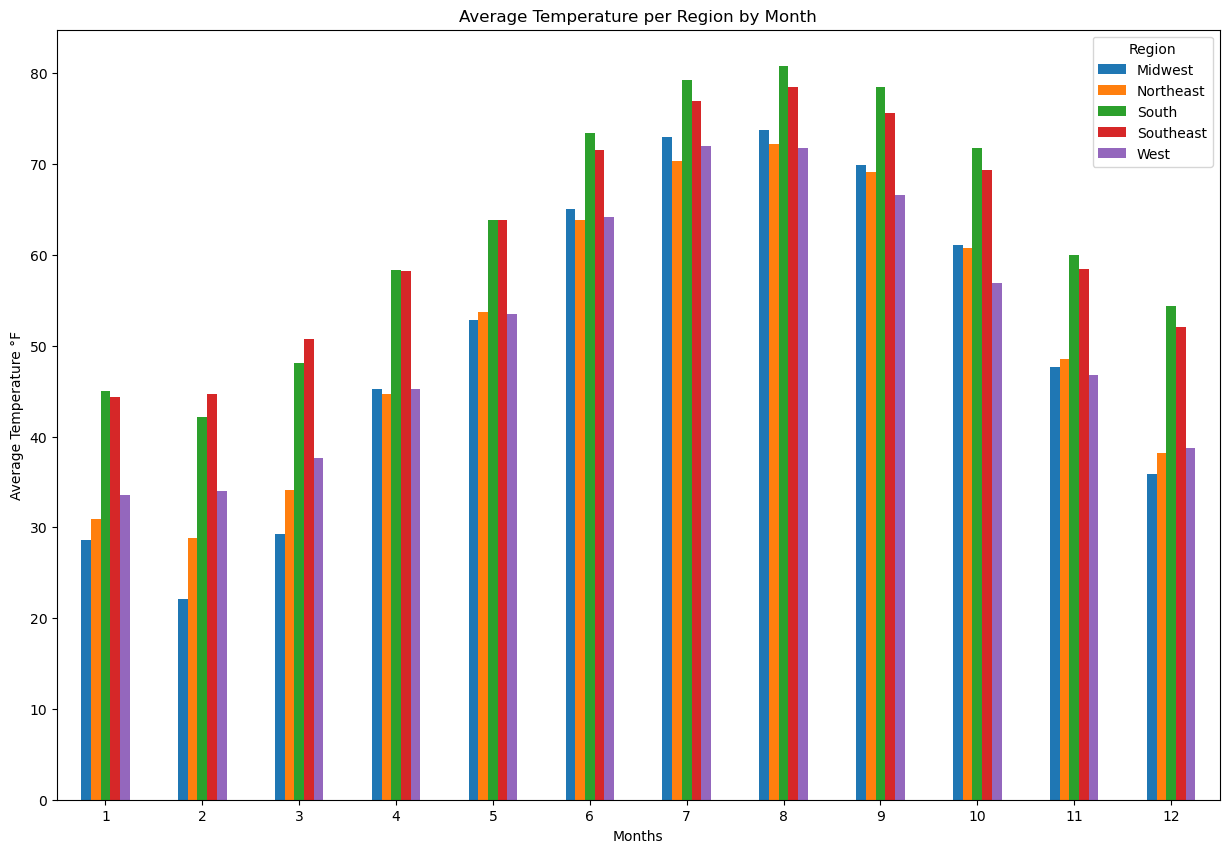

In [ ]:
#plotting avg temp by month per region

region_month_temp.pivot(index='Month', columns='Region', values='Average Temp').plot(kind='bar', figsize=(15, 10))

plt.title('Average Temperature per Region by Month')
plt.xlabel('Months')
plt.ylabel('Average Temperature °F')
plt.xticks(rotation=0)
plt.show()

In [17]:
region_month_temp["Average Temp"] = region_month_temp["Average Temp"].astype(int)


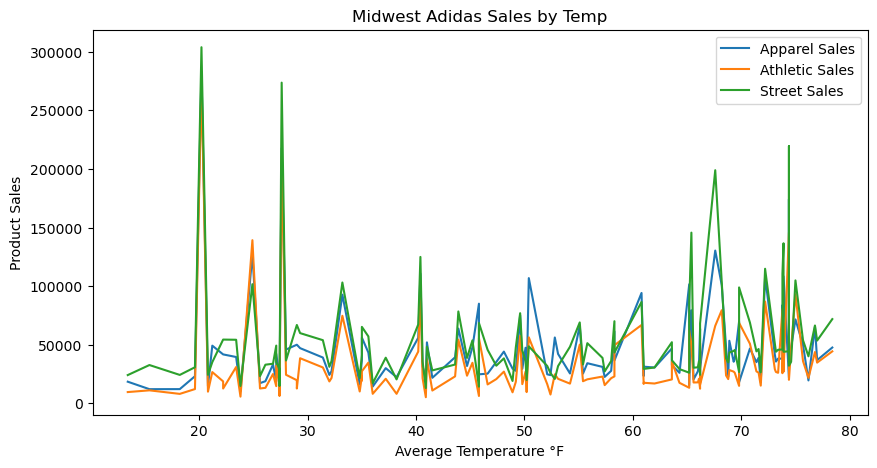

In [ ]:
'''plotting sales by avg temperature by product category for each region'''
fig, ax = plt.subplots(figsize=(10,5))


apparel_mw.plot(ax=ax)
athletic_mw.plot(ax=ax)
street_mw.plot(ax=ax)

plt.title('Midwest Adidas Sales by Temp')
plt.xlabel('Average Temperature °F')
plt.ylabel('Product Sales')
plt.show()

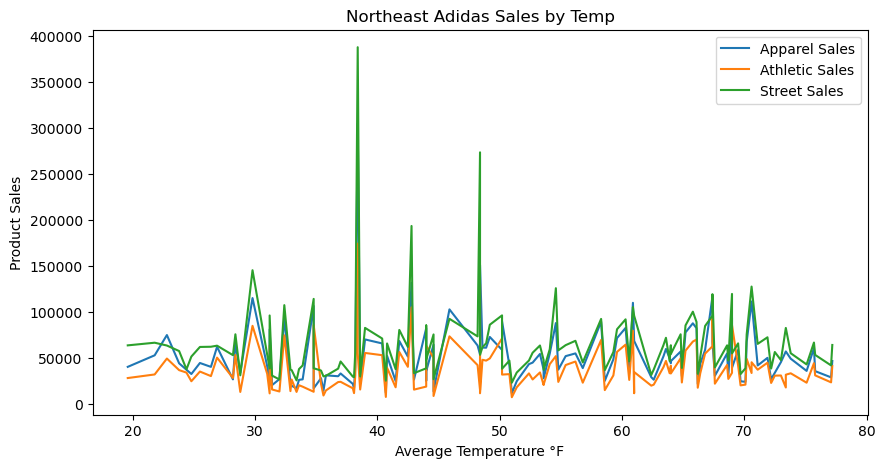

In [19]:
fig, ax = plt.subplots(figsize=(10,5))


apparel_ne.plot(ax=ax)
athletic_ne.plot(ax=ax)
street_ne.plot(ax=ax)

plt.title('Northeast Adidas Sales by Temp')
plt.xlabel('Average Temperature °F')
plt.ylabel('Product Sales')
plt.show()

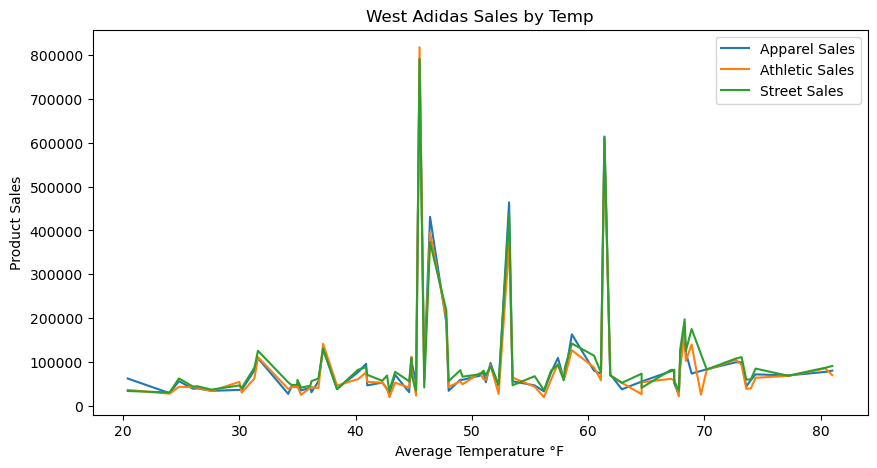

In [20]:
fig, ax = plt.subplots(figsize=(10,5))


apparel_west.plot(ax=ax)
athletic_west.plot(ax=ax)
street_west.plot(ax=ax)

plt.title('West Adidas Sales by Temp')
plt.xlabel('Average Temperature °F')
plt.ylabel('Product Sales')
plt.show()

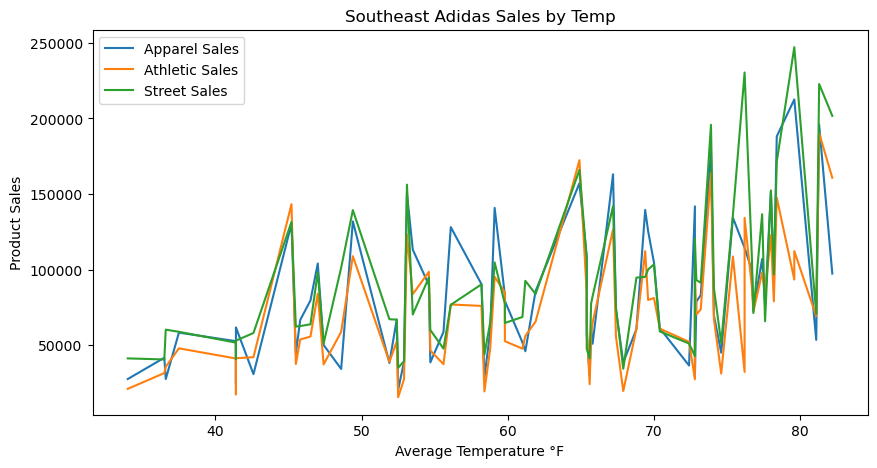

In [21]:
fig, ax = plt.subplots(figsize=(10,5))


apparel_se.plot(ax=ax)
athletic_se.plot(ax=ax)
street_se.plot(ax=ax)

plt.title('Southeast Adidas Sales by Temp')
plt.xlabel('Average Temperature °F')
plt.ylabel('Product Sales')
plt.show()

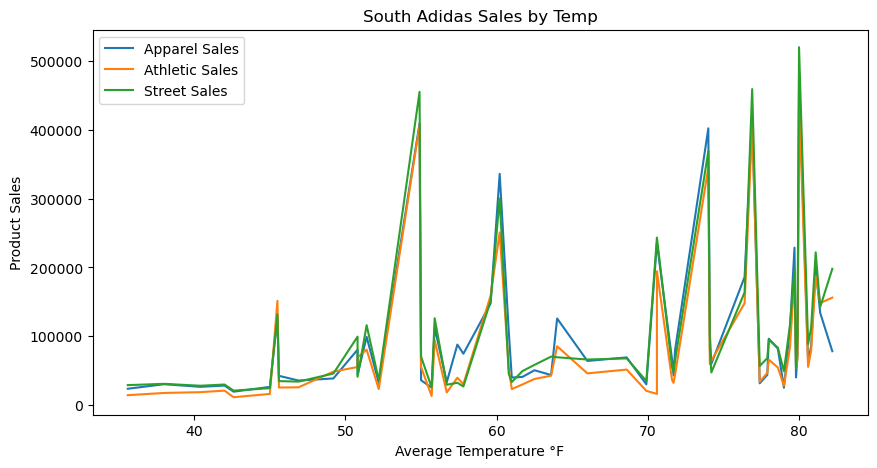

In [22]:
fig, ax = plt.subplots(figsize=(10,5))


apparel_s.plot(ax=ax)
athletic_s.plot(ax=ax)
street_s.plot(ax=ax)

plt.title('South Adidas Sales by Temp')
plt.xlabel('Average Temperature °F')
plt.ylabel('Product Sales')
plt.show()

In [ ]:
#prepping data for prophet
adidas_trends = adidas_default
adidas_trends.drop('State', axis = 1, inplace=True)

# Merging Year and Month columns as a datetime dtype
adidas_trends['Date'] = pd.to_datetime(adidas_trends['Year'].astype(str) + '-' + adidas_trends['Month'].astype(str).str.zfill(2))

adidas_trends = adidas_trends.set_index('Date')

adidas_trends.drop(['Year', 'Month'], axis=1, inplace=True)

adidas_trends = adidas_trends[['Region', 'Total Sales']]

adidas_trends = adidas_trends.sort_index()

#slicing just to be sure
adidas_trends = adidas_trends.loc['2021']
adidas_trends.head()

,Region,Total Sales
Date,,
2021-01-01,Northeast,9822
2021-01-01,Northeast,24750
2021-01-01,Northeast,15219
2021-01-01,South,20984
2021-01-01,South,25330


In [24]:
adidas_trends.to_csv('Resources/adidas_default_trends')

In [25]:
#prepping category data for prophet
apparel_trends.drop('Region', axis=1, inplace=True)
apparel_trends = apparel_trends.rename(
    columns={
        'Date': 'ds',
        'Total Sales': 'y'
    }
)

display(apparel_trends.head())

street_trends.drop('Region', axis=1, inplace=True)
street_trends = street_trends.rename(
    columns={
        'Date': 'ds',
        'Total Sales': 'y'
    }
)

display(street_trends.head())

athletic_trends.drop('Region', axis=1, inplace=True)
athletic_trends = athletic_trends.rename(
    columns={
        'Date': 'ds',
        'Total Sales': 'y'
    }
)

display(athletic_trends.head())

total_2021_trends.drop('Unnamed: 0', axis=1, inplace=True)

display(total_2021_trends.head())

,ds,y
0,2021-01-01,24565
1,2021-01-01,44924
2,2021-01-01,791798
3,2021-01-01,17196
4,2021-01-01,62033


,ds,y
0,2021-01-01,31568
1,2021-01-01,36095
2,2021-01-01,47700
3,2021-01-01,790322
4,2021-01-01,31175


,ds,y
0,2021-01-01,18728
1,2021-01-01,21642
2,2021-01-01,42734
3,2021-01-01,817675
4,2021-01-01,18705


,ds,y
0,2021-01-01,7432010
1,2021-02-01,6123021
2,2021-03-01,5220756
3,2021-04-01,6498318
4,2021-05-01,8576901


In [26]:
apparel_model = Prophet()
apparel_model


In [27]:

street_model = Prophet()
street_model


In [28]:

athletic_model = Prophet()
athletic_model


In [29]:

total_model = Prophet()
total_model

In [30]:
apparel_model.fit(apparel_trends)

09:33:05 - cmdstanpy - INFO - Chain [1] start processing
09:33:05 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
athletic_model.fit(athletic_trends)

09:33:05 - cmdstanpy - INFO - Chain [1] start processing
09:33:05 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
street_model.fit(street_trends)

09:33:05 - cmdstanpy - INFO - Chain [1] start processing
09:33:05 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
total_model.fit(total_2021_trends)

09:33:05 - cmdstanpy - INFO - Chain [1] start processing
09:33:05 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future_apparel = apparel_model.make_future_dataframe(periods=9504, freq='h')


In [35]:
future_athletic = athletic_model.make_future_dataframe(periods=9504, freq='h')


In [36]:
future_street = street_model.make_future_dataframe(periods=9504, freq='h')


In [37]:
future_total = total_model.make_future_dataframe(periods=9504, freq='h')


In [38]:
forecast_apparel = apparel_model.predict(future_apparel)

In [39]:
forecast_athletic = athletic_model.predict(future_athletic)

In [40]:
forecast_street = street_model.predict(future_street)

In [41]:
forecast_total = total_model.predict(future_total)

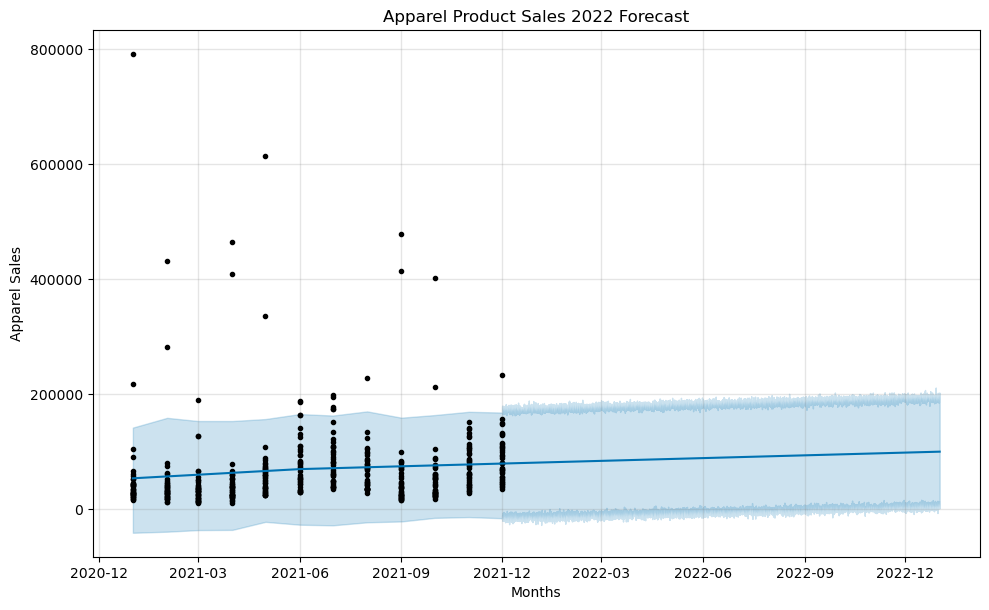

In [ ]:
'''plotting prophet forecasts'''
apparel_model.plot(forecast_apparel)
plt.title('Apparel Product Sales 2022 Forecast')
plt.xlabel('Months')
plt.ylabel('Apparel Sales')
plt.show()

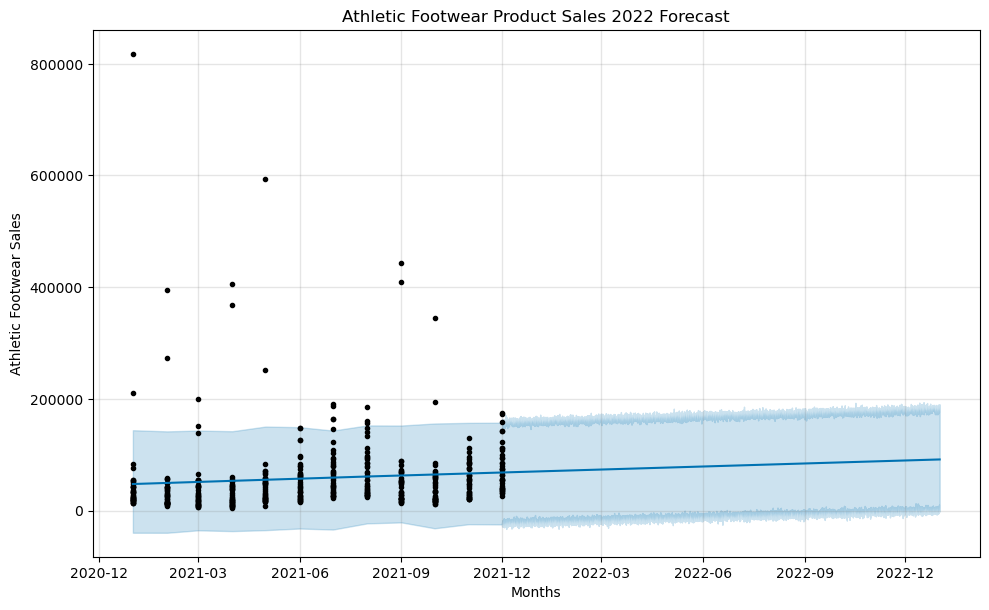

In [43]:
athletic_model.plot(forecast_athletic)
plt.title('Athletic Footwear Product Sales 2022 Forecast')
plt.xlabel('Months')
plt.ylabel('Athletic Footwear Sales')
plt.show()

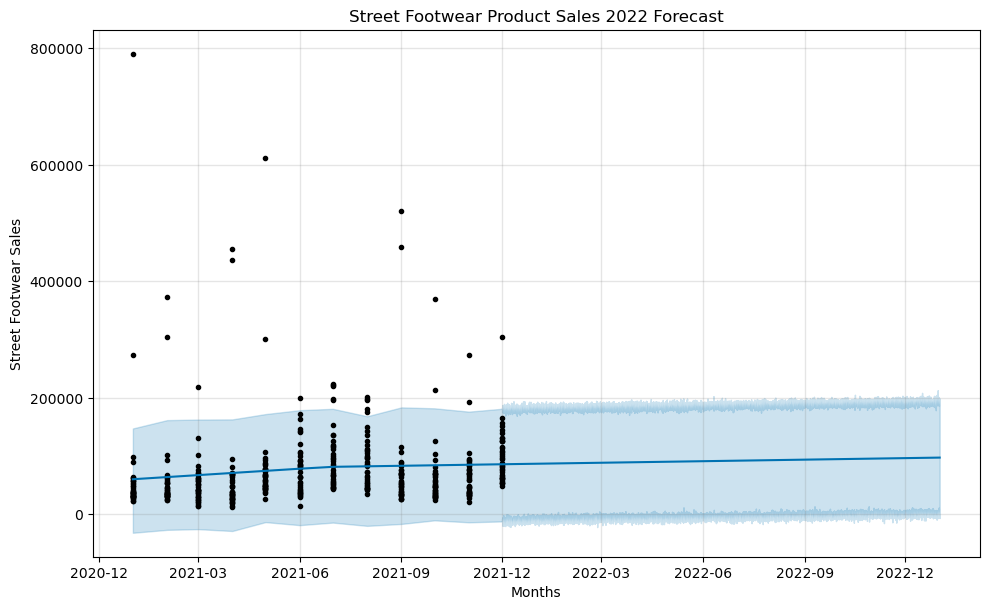

In [44]:
street_model.plot(forecast_street)
plt.title('Street Footwear Product Sales 2022 Forecast')
plt.xlabel('Months')
plt.ylabel('Street Footwear Sales')
plt.show()

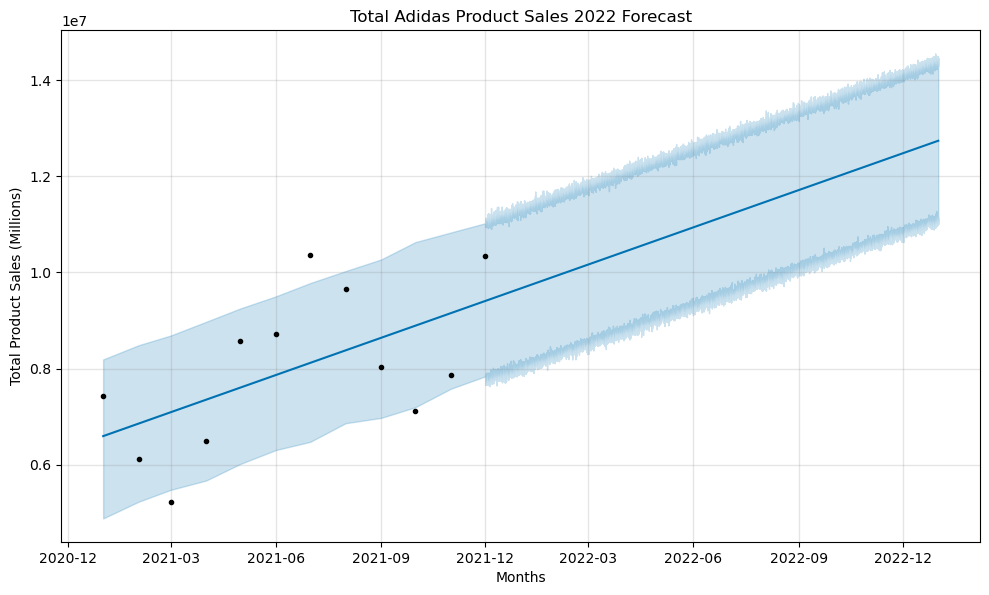

In [45]:
total_model.plot(forecast_total)
plt.title('Total Adidas Product Sales 2022 Forecast')
plt.xlabel('Months')
plt.ylabel('Total Product Sales (Millions)')
plt.show()

In [46]:
adidas_default = pd.read_csv('Resources/adidas_default')

adidas_default = adidas_default[['Year', 'Month', 'Region', 'Average Temp', 'Total Sales']]
adidas_default.head()

,Year,Month,Region,Average Temp,Total Sales
0,2021,8,South,79.7,91281
1,2021,8,South,79.7,111112
2,2021,8,South,79.7,129994
3,2021,8,South,79.7,137378
4,2021,8,South,79.7,75010


In [47]:
#prepping data for correlation analysis
adidas_default['Date'] = pd.to_datetime(adidas_default['Year'].astype(str) + '-' + adidas_default['Month'].astype(str).str.zfill(2))

adidas_default = adidas_default.set_index('Date')
adidas_default = adidas_default.sort_index()


adidas_matrix = adidas_default[['Average Temp', 'Total Sales']]
adidas_matrix.head()

,Average Temp,Total Sales
Date,,
2021-01-01,33.4,9822
2021-01-01,35.4,24750
2021-01-01,35.4,15219
2021-01-01,50.8,20984
2021-01-01,50.8,25330


In [48]:
import seaborn as sns

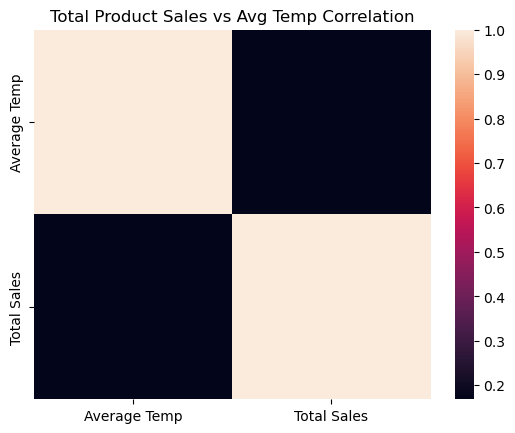

,Average Temp,Total Sales
Average Temp,1.000000,0.168579
Total Sales,0.168579,1.000000


In [ ]:
#plotting total correlation
adidas_matrix = adidas_matrix.corr()

sns.heatmap(adidas_matrix)
plt.title('Total Product Sales vs Avg Temp Correlation')
plt.show()
adidas_matrix

In [50]:
'''slicing for regional .corr() analysis'''
mw_matrix = adidas_default.set_index('Region')
mw_matrix = mw_matrix.loc['Midwest'].reset_index()

mw_matrix['Date'] = pd.to_datetime(mw_matrix['Year'].astype(str) + '-' + mw_matrix['Month'].astype(str).str.zfill(2))

mw_matrix = mw_matrix.set_index('Date')
mw_matrix = mw_matrix.sort_index()

mw_matrix = mw_matrix[['Average Temp', 'Total Sales']]

mw_matrix.head()

,Average Temp,Total Sales
Date,,
2021-01-01,25.6,7710
2021-01-01,25.6,9530
2021-01-01,25.6,17028
2021-01-01,32.2,12391
2021-01-01,32.2,24995


In [51]:
ne_matrix = adidas_default.set_index('Region')
ne_matrix = ne_matrix.loc['Northeast'].reset_index()

ne_matrix['Date'] = pd.to_datetime(ne_matrix['Year'].astype(str) + '-' + ne_matrix['Month'].astype(str).str.zfill(2))

ne_matrix = ne_matrix.set_index('Date')
ne_matrix = ne_matrix.sort_index()

ne_matrix = ne_matrix[['Average Temp', 'Total Sales']]

ne_matrix.head()

,Average Temp,Total Sales
Date,,
2021-01-01,33.4,9822
2021-01-01,35.4,24750
2021-01-01,35.4,15219
2021-01-01,38.0,8603
2021-01-01,38.0,4776


In [52]:
w_matrix = adidas_default.set_index('Region')
w_matrix = w_matrix.loc['West'].reset_index()

w_matrix['Date'] = pd.to_datetime(w_matrix['Year'].astype(str) + '-' + w_matrix['Month'].astype(str).str.zfill(2))

w_matrix = w_matrix.set_index('Date')
w_matrix = w_matrix.sort_index()

w_matrix = w_matrix[['Average Temp', 'Total Sales']]

w_matrix.head()

,Average Temp,Total Sales
Date,,
2021-01-01,34.5,27040
2021-01-01,34.5,16690
2021-01-01,34.5,30012
2021-01-01,34.5,20660
2021-01-01,34.5,26044


In [53]:
se_matrix = adidas_default.set_index('Region')
se_matrix = se_matrix.loc['Southeast'].reset_index()

se_matrix['Date'] = pd.to_datetime(se_matrix['Year'].astype(str) + '-' + se_matrix['Month'].astype(str).str.zfill(2))

se_matrix = se_matrix.set_index('Date')
se_matrix = se_matrix.sort_index()

se_matrix = se_matrix[['Average Temp', 'Total Sales']]

se_matrix.head()

,Average Temp,Total Sales
Date,,
2021-01-01,58.2,45613
2021-01-01,58.2,45522
2021-01-01,37.5,29722
2021-01-01,37.5,38511
2021-01-01,37.5,28629


In [54]:
s_matrix = adidas_default.set_index('Region')
s_matrix = s_matrix.loc['South'].reset_index()

s_matrix['Date'] = pd.to_datetime(s_matrix['Year'].astype(str) + '-' + s_matrix['Month'].astype(str).str.zfill(2))

s_matrix = s_matrix.set_index('Date')
s_matrix = s_matrix.sort_index()

s_matrix = s_matrix[['Average Temp', 'Total Sales']]

s_matrix.head()

,Average Temp,Total Sales
Date,,
2021-01-01,50.8,20984
2021-01-01,50.8,25330
2021-01-01,50.8,24868
2021-01-01,46.9,18678
2021-01-01,46.9,16955


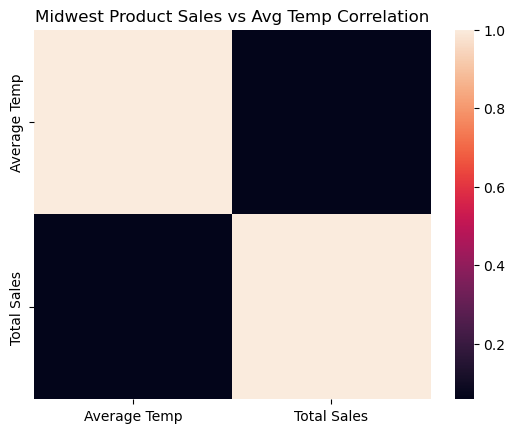

,Average Temp,Total Sales
Average Temp,1.000000,0.058553
Total Sales,0.058553,1.000000


In [ ]:
'''plotting and calculating regional correlations'''
mw_matrix = mw_matrix.corr()

sns.heatmap(mw_matrix)
plt.title('Midwest Product Sales vs Avg Temp Correlation')
plt.show()
mw_matrix

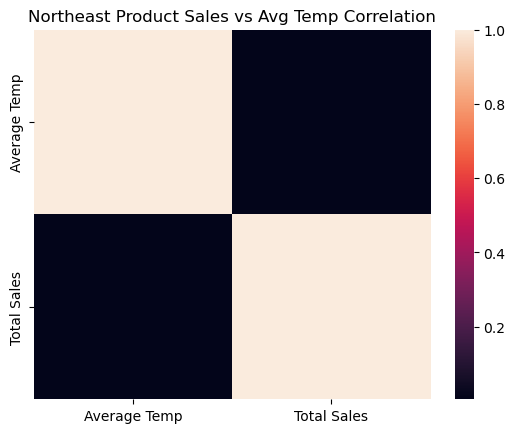

,Average Temp,Total Sales
Average Temp,1.000000,0.004252
Total Sales,0.004252,1.000000


In [56]:
ne_matrix = ne_matrix.corr()

sns.heatmap(ne_matrix)
plt.title('Northeast Product Sales vs Avg Temp Correlation')
plt.show()
ne_matrix

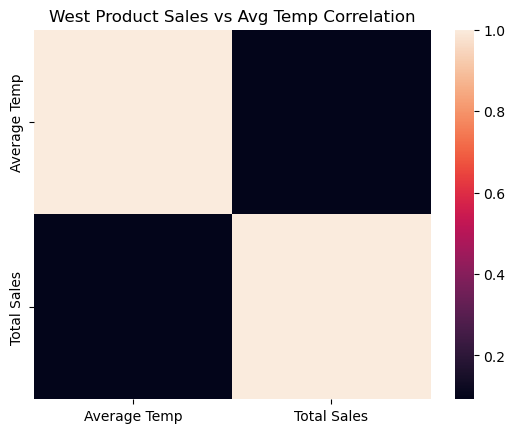

,Average Temp,Total Sales
Average Temp,1.000000,0.092317
Total Sales,0.092317,1.000000


In [57]:
w_matrix = w_matrix.corr()

sns.heatmap(w_matrix)
plt.title('West Product Sales vs Avg Temp Correlation')
plt.show()
w_matrix

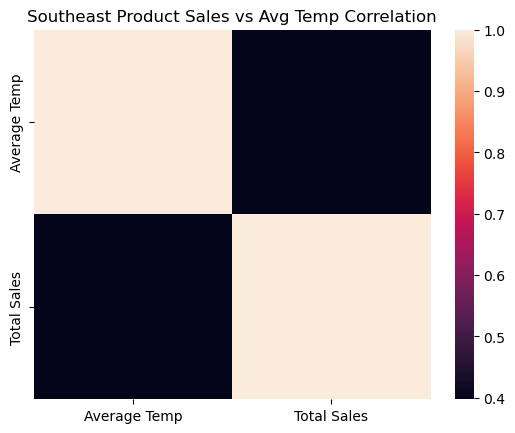

,Average Temp,Total Sales
Average Temp,1.000000,0.397515
Total Sales,0.397515,1.000000


In [58]:
se_matrix = se_matrix.corr()

sns.heatmap(se_matrix)
plt.title('Southeast Product Sales vs Avg Temp Correlation')
plt.show()
se_matrix

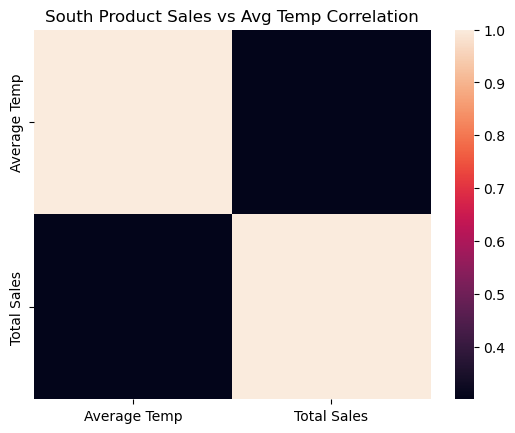

,Average Temp,Total Sales
Average Temp,1.00000,0.30011
Total Sales,0.30011,1.00000


In [59]:
s_matrix = s_matrix.corr()

sns.heatmap(s_matrix)
plt.title('South Product Sales vs Avg Temp Correlation')
plt.show()
s_matrix